In [2]:
from module.ms_module import MS
from preprocess.ms_preprocess import MSIPreprocessor
from module.ms_data_manager_imzml import MSDataManagerImzML
from tools.plot import plot_spectrum
from logger import get_logger

logger = get_logger("example")

INFO:     25-11-14 15:53 103 ms_data_manager_imzml - Extracting metadata...
INFO:     25-11-14 15:53 114 ms_data_manager_imzml - Metadata extraction completed.
INFO:     25-11-14 15:53 80 ms_data_manager_imzml - Loading data from data/example.imzML...
INFO:     25-11-14 15:53 202 ms_data_manager - creating ms mask.
INFO:     25-11-14 15:53 44 tools.plot - Plotting spectrum with plot_mode=['line', 'line'], mz_range=None, intensity_range=None, metrics_box=True, title_suffix=None, overlay=False


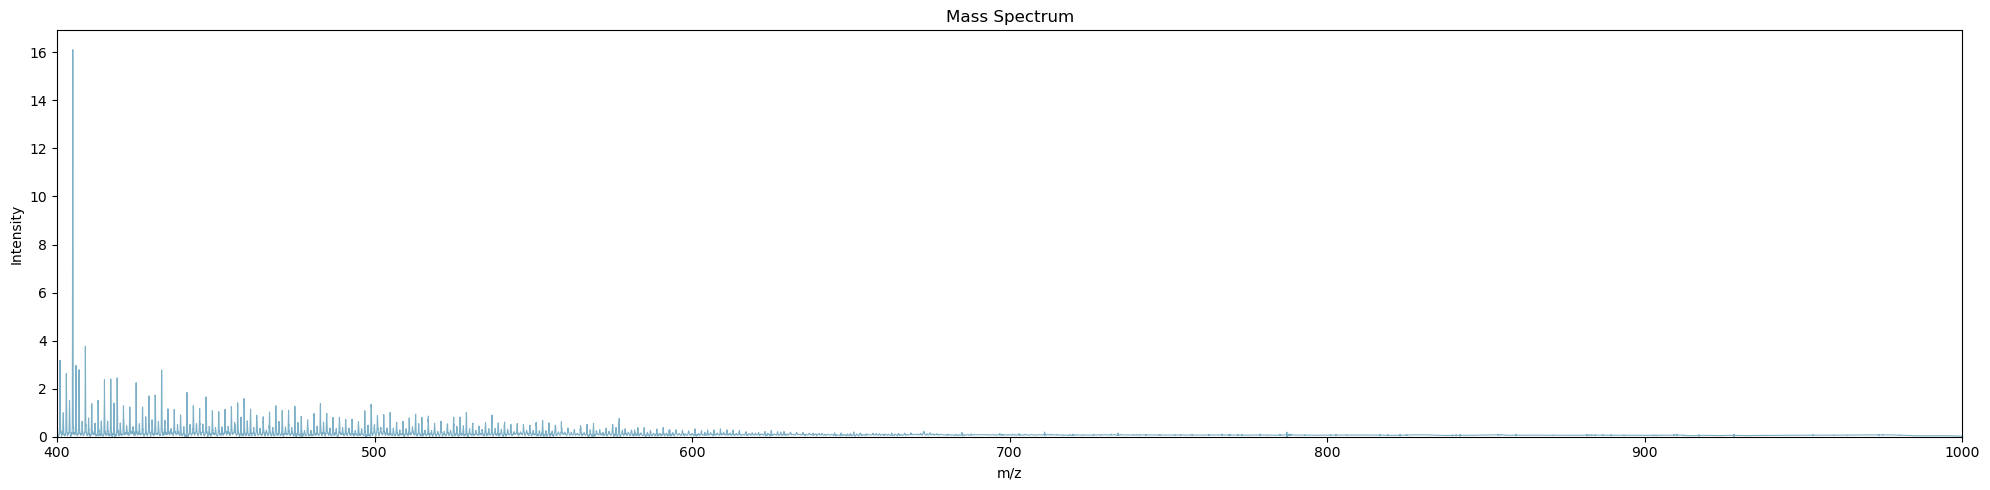

In [3]:
# Run examples when executing this file directly
if __name__ == "__main__":
    FILE_PATH = "data/example.imzML"
    ms = MS()
    ms_md = MSDataManagerImzML(ms, filepath=FILE_PATH)
    ms_md.load_full_data_from_file()
    sp = ms[0]

    denoised = MSIPreprocessor.noise_reduction_spectrum(
        data=sp,
        method="wavelet",
        window=10,
    )
    plot_spectrum(denoised)

INFO:     25-11-14 15:53 44 tools.plot - Plotting spectrum with plot_mode=['line', 'line'], mz_range=(500.0, 510.0), intensity_range=(0, 1.2), metrics_box=True, title_suffix=test, overlay=False
INFO:     25-11-14 15:53 421 ms_preprocess - SNR: signal_level:0.6641188859939575, noise:0.1
INFO:     25-11-14 15:53 421 ms_preprocess - SNR: signal_level:0.5838738594489141, noise:0.1
INFO:     25-11-14 15:53 129 tools.plot - Range: 500.0000 - 509.9936
                                          Correlation: 0.9480
                                          TIC ratio: 0.986
                                          SNR orig: 6.6
                                          SNR den: 5.8
                                          SNR improvement: 0.88x


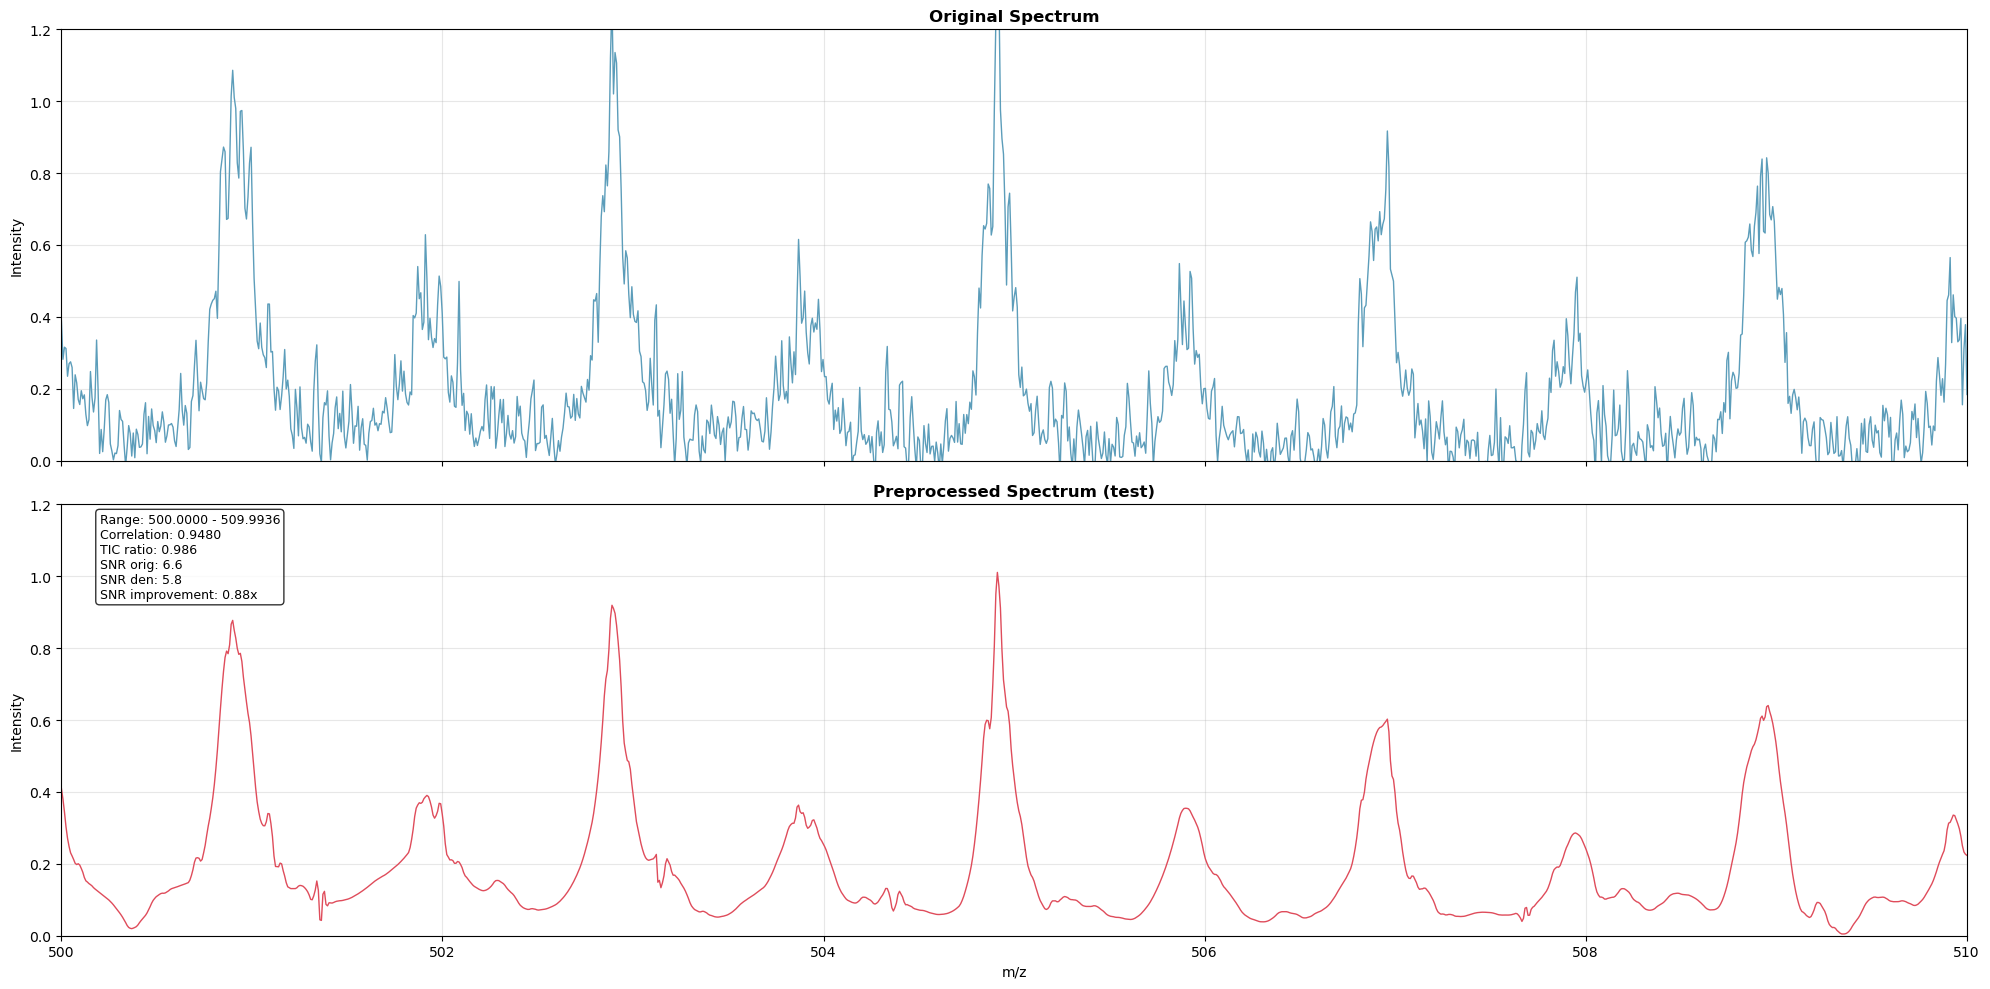

INFO:     25-11-14 15:53 421 ms_preprocess - SNR: signal_level:0.32792559162268237, noise:0.1
3.2792559162268233


In [4]:
# Plotting
plot_spectrum(
    base=sp,
    target=denoised,
    mz_range=(500.0, 510.0),
    intensity_range=(0, 1.2),
    title_suffix='test',
    overlay=False,
)
print(MSIPreprocessor.calculate_snr_spectrum(spectrum=denoised))


INFO:     25-11-14 15:54 44 tools.plot - Plotting spectrum with plot_mode=['line', 'line'], mz_range=(500.0, 510.0), intensity_range=(0, 1.2), metrics_box=True, title_suffix=None, overlay=False


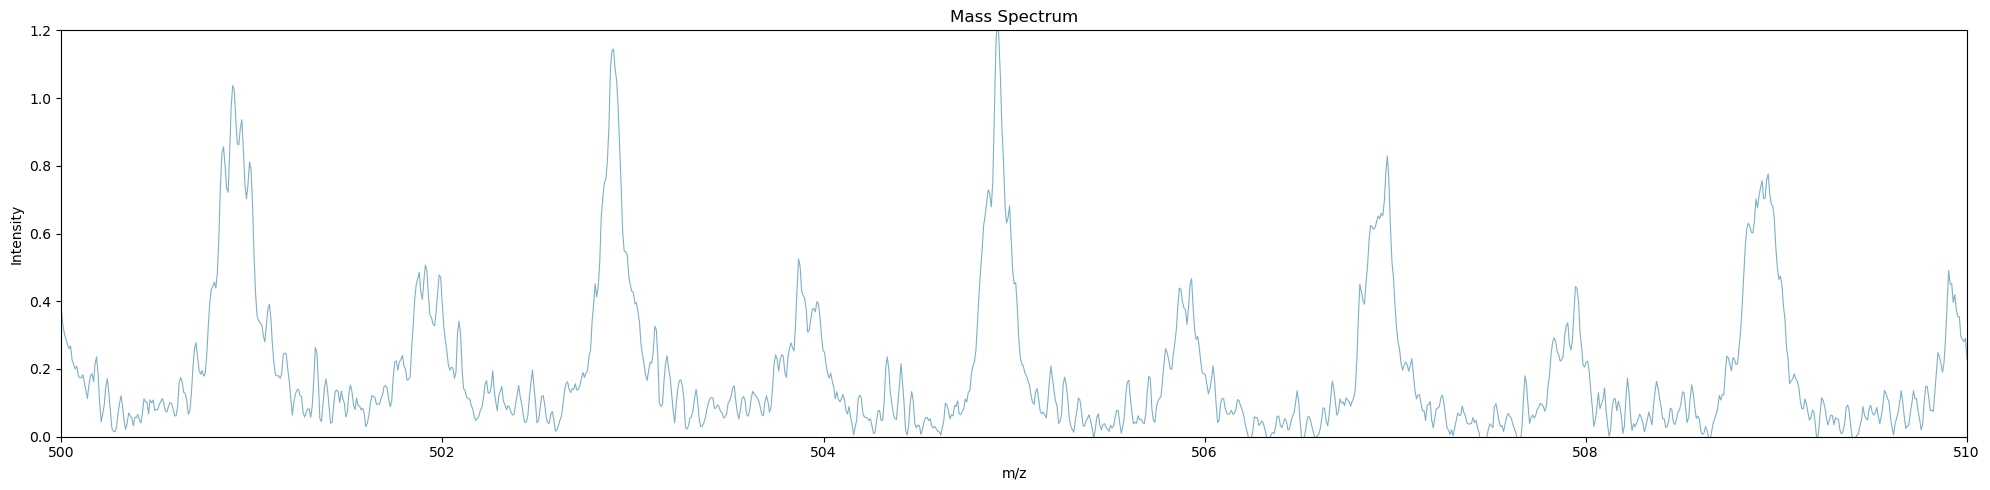

In [5]:
for i, spectrum in enumerate(ms):
    denoised = MSIPreprocessor.noise_reduction_spectrum(spectrum,method="ma")
    ms[i].mz_list = denoised.mz_list
    ms[i].intensity = denoised.intensity

denoise_test = ms[0]
plot_spectrum(denoise_test,    
                mz_range=(500.0, 510.0),
                intensity_range=(0, 1.2),)


In [6]:
for i, spectrum in enumerate(ms):
    peakpicked = MSIPreprocessor.peak_pick_spectrum(spectrum,relheight=0.001,return_type="area")
    ms[i].mz_list = peakpicked.mz_list
    ms[i].intensity = peakpicked.intensity


/Users/neo/Desktop/MassFlow/preprocess/peak_pick_helper.py:116: PeakPropertyWarning: some peaks have a width of 0
  peaks, props = find_peaks(intensity,


INFO:     25-11-14 15:03 44 tools.plot - Plotting spectrum with plot_mode=['stem'], mz_range=None, intensity_range=None, metrics_box=True, title_suffix=None, overlay=False


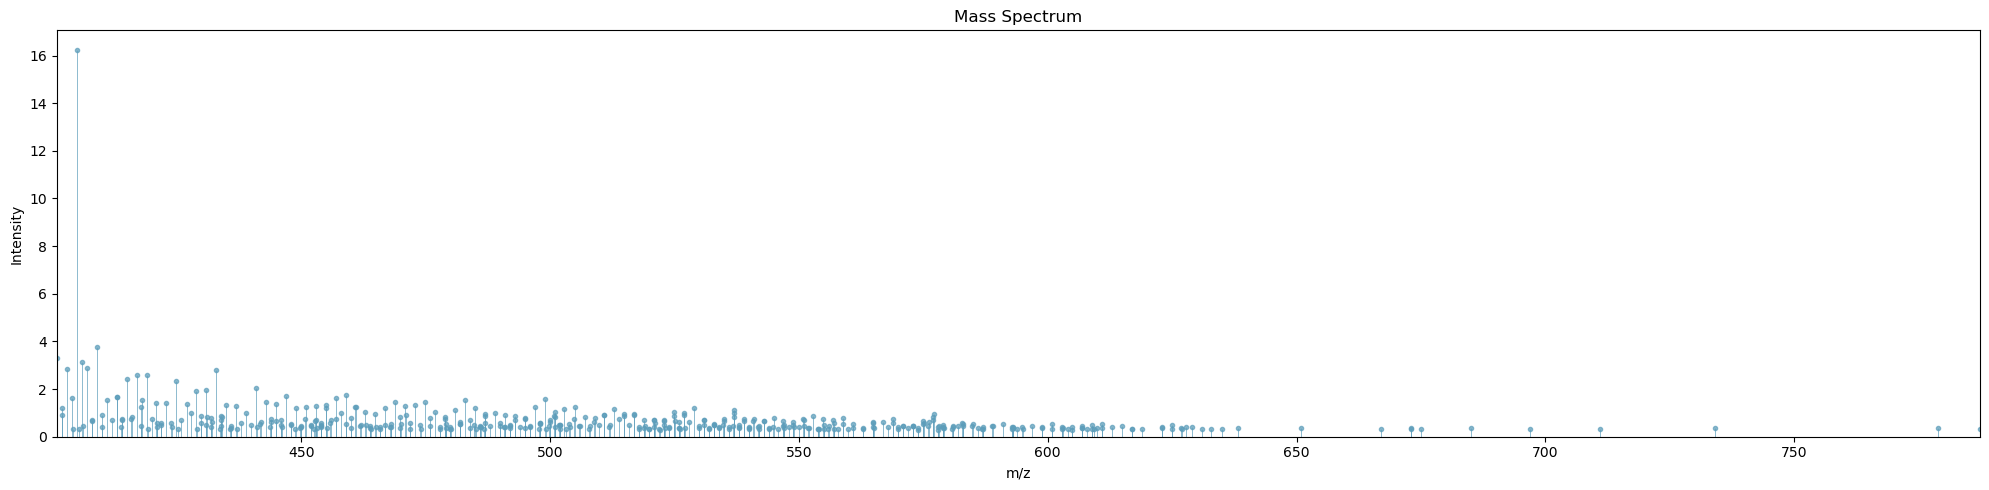

In [6]:
peakpicked = ms[0]
plot_spectrum(peakpicked,
            plot_mode=["stem"])

In [9]:
ms_ali = MSIPreprocessor.peak_alignment(ms_data=ms,mz_res=0.001,ref_method='histogram',tolerance=0.05,units='da',combiner='max')

INFO:     25-11-14 15:05 198 peak alignment - Histogram/Loess reference axis generated: 8672 features (mz_res=0.001, px_perc=0.01, N_sample=17176)
INFO:     25-11-14 15:05 365 peak alignment - Peak alignment using diff completed: 17176 pixels, 8672 reference features (combiner=max, units=da, tol=0.05)


INFO:     25-11-14 15:05 44 tools.plot - Plotting spectrum with plot_mode=['stem'], mz_range=None, intensity_range=None, metrics_box=True, title_suffix=None, overlay=False


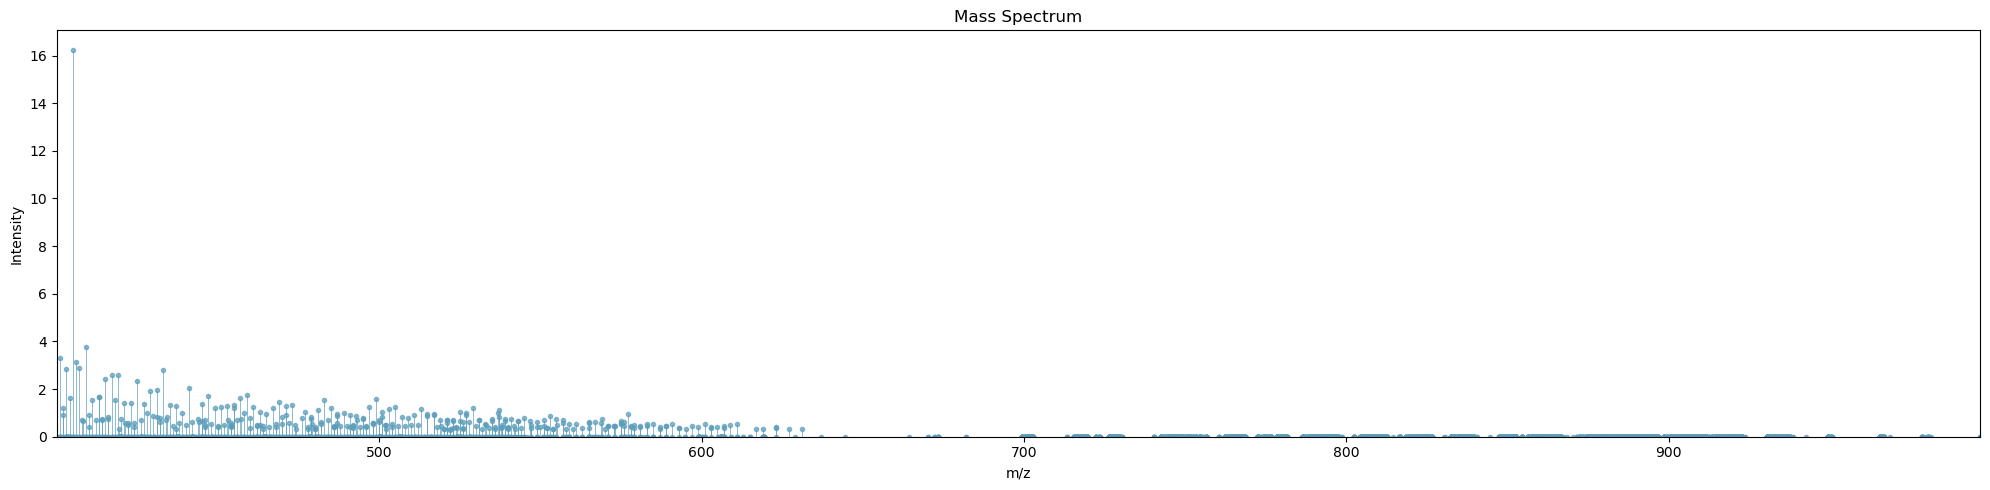

In [ ]:
spectrum_alit = ms_ali[0]
(spectrum_alit,
            plot_mode=["stem"])

In [12]:
ms_ali = MSIPreprocessor.peak_alignment(ms_data=ms,ref_method='mean',combiner='max',min_distance_da=0.01,round_digits=4,half_window=5,snr_threshold=3,tolerance=0.2,units='da',match_method='diff')


INFO:     25-11-14 15:06 453 peak alignment - Global mean spectrum computed: 65485 features (agg=mean)
INFO:     25-11-14 15:06 365 peak alignment - Peak alignment using diff completed: 17176 pixels, 4701 reference features (combiner=max, units=da, tol=0.2)


INFO:     25-11-14 15:07 44 tools.plot - Plotting spectrum with plot_mode=['stem'], mz_range=None, intensity_range=None, metrics_box=True, title_suffix=None, overlay=False


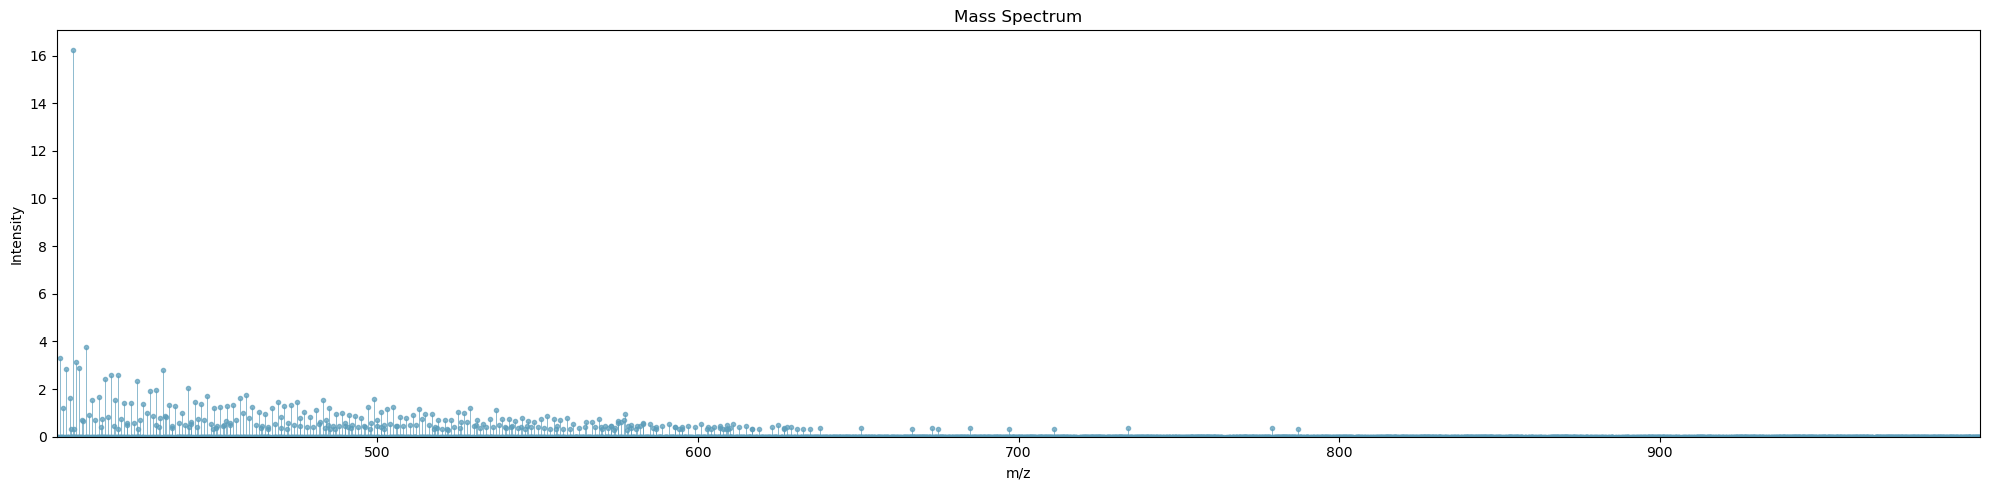

In [13]:
spectrum_alit = ms_ali[0]
plot_spectrum(spectrum_alit,
            plot_mode=["stem"])

In [ ]:
ms_ali.plot_ms_mask()